In [1]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
path = "../../results/disco3_F.npy"
matches = np.load(path, allow_pickle=True)

# Convertir a DataFrame
df = pd.DataFrame(list(matches))    

In [4]:
path = "../../results/no_disco3_F.npy"
matches2 = np.load(path, allow_pickle=True)

In [5]:
df.sort_values(by='halo_TNG50-1', inplace=True)
df.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,dist,cost
18,11,0,15167.142578,0,15105.009766,10.565468,0.01057
188,37,0,15167.142578,0,15105.009766,10.565468,0.01057
332,45,0,15167.142578,0,15105.009766,10.565468,0.01057
41,17,0,15167.142578,0,15105.009766,10.565468,0.01057
309,44,0,15167.142578,0,15105.009766,10.565468,0.01057


In [6]:
# Convertir a DataFrame
df2 = pd.DataFrame(list(matches2))


In [7]:
df2.head()
#len(df2)

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,dist,cost
0,473329,108,137.709534,119.0,129.388672,2.458024,0.061393
1,474008,109,165.795670,104.0,163.647598,17.178057,0.072550
2,475016,110,169.659134,116.0,163.841049,13.785883,0.066391
3,475619,111,194.144821,125.0,182.402695,45.067680,0.187689
4,476266,112,141.648865,106.0,134.557953,21.380350,0.106172


In [8]:
#ver cuántos halos unicos (halos_TNG50-1) hay en df y df2
unique_halos_df = df['halo_TNG50-1'].nunique()
unique_halos_df2 = df2['halo_TNG50-1'].nunique()

print(f"Unique halos in df: {unique_halos_df}")
print(f"Unique halos in df2: {unique_halos_df2}")

Unique halos in df: 108
Unique halos in df2: 10246904


In [9]:
df2_range = df2[(df2['Mvir_TNG50-1'] >= df['Mvir_TNG50-1'].min()) & (df2['Mvir_TNG50-1'] <= df['Mvir_TNG50-1'].max())].reset_index(drop=True)

In [10]:
#ver cuántos halos unicos (halos_TNG50-1) hay en df y df2
unique_halos_df = df['halo_TNG50-1'].nunique()
unique_halos_df2 = df2_range['halo_TNG50-1'].nunique()

print(f"Unique halos in df: {unique_halos_df}")
print(f"Unique halos in df2: {unique_halos_df2}")

Unique halos in df: 108
Unique halos in df2: 60


In [11]:
#ver si hay algun duplicado en la columna halo_TNG50-2
df2['halo_TNG50-2'].duplicated().any()

#imprimir los indices de los halos duplicados en la columna halo_TNG50-2 y el numero de veces que se repite cada uno
duplicados = df2['halo_TNG50-2'][df2['halo_TNG50-2'].duplicated(keep=False)]
print(duplicados.value_counts())

halo_TNG50-2
48952.0     3
44475.0     3
10076.0     3
9695.0      3
14012.0     3
           ..
27746.0     2
41571.0     2
136334.0    2
25352.0     2
45936.0     2
Name: count, Length: 752, dtype: int64


In [12]:
df2.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,dist,cost
0,473329,108,137.709534,119.0,129.388672,2.458024,0.061393
1,474008,109,165.795670,104.0,163.647598,17.178057,0.072550
2,475016,110,169.659134,116.0,163.841049,13.785883,0.066391
3,475619,111,194.144821,125.0,182.402695,45.067680,0.187689
4,476266,112,141.648865,106.0,134.557953,21.380350,0.106172


In [13]:
len(df2[(df2['Mvir_TNG50-1']>=df['Mvir_TNG50-1'].min())&(df2['Mvir_TNG50-1']<=df['Mvir_TNG50-1'].max())]['halo_TNG50-1'].unique())

60

No hay duplicados en este dataframe en TNG50-1 (se buscaron directamente los halos fof y no los subhalos como en el anterior)

In [14]:
#filtrar por halos con masa mayor a 1 en TNG50-1
df = df[df['Mvir_TNG50-1'] > 0]
#filtrar por halos con masa mayor a 1 en TNG50-1
df2 = df2[df2['Mvir_TNG50-1'] > 0]

#filtrar por halos con masa mayor a 1 en TNG50-2
df = df[df['Mvir_TNG50-2'] > 0]
#filtrar por halos con masa mayor a 1 en TNG50-2
df2 = df2[df2['Mvir_TNG50-2'] > 0]


In [15]:
#juntar los dos dataframes
df_combined = pd.concat([df, df2])
#solo graficar la masa de halos unicos en TNG50-1 (es decir que no se repitan los halos con mismo id)


In [16]:
df_noduplicates = df_combined.copy()
df_noduplicates = df_noduplicates.drop_duplicates(subset=['halo_TNG50-1'])

In [17]:
df_noduplicates['halo_TNG50-2'].duplicated(keep=False)

18          False
371         False
373         False
10          False
24          False
            ...  
9777294     False
9796646     False
9800032     False
10235140     True
10241240    False
Name: halo_TNG50-2, Length: 72751, dtype: bool

In [18]:
#imprimir los indices duplicados en el dataframe combinado en TNG50-2 y el numero de veces que se repite cada uno
duplicados_combined = df_noduplicates['halo_TNG50-2'][df_noduplicates['halo_TNG50-2'].duplicated(keep=False)]
print(duplicados_combined.value_counts())

halo_TNG50-2
48952.0     3
44475.0     3
10076.0     3
9695.0      3
14012.0     3
           ..
27746.0     2
41571.0     2
136334.0    2
25352.0     2
45936.0     2
Name: count, Length: 752, dtype: int64


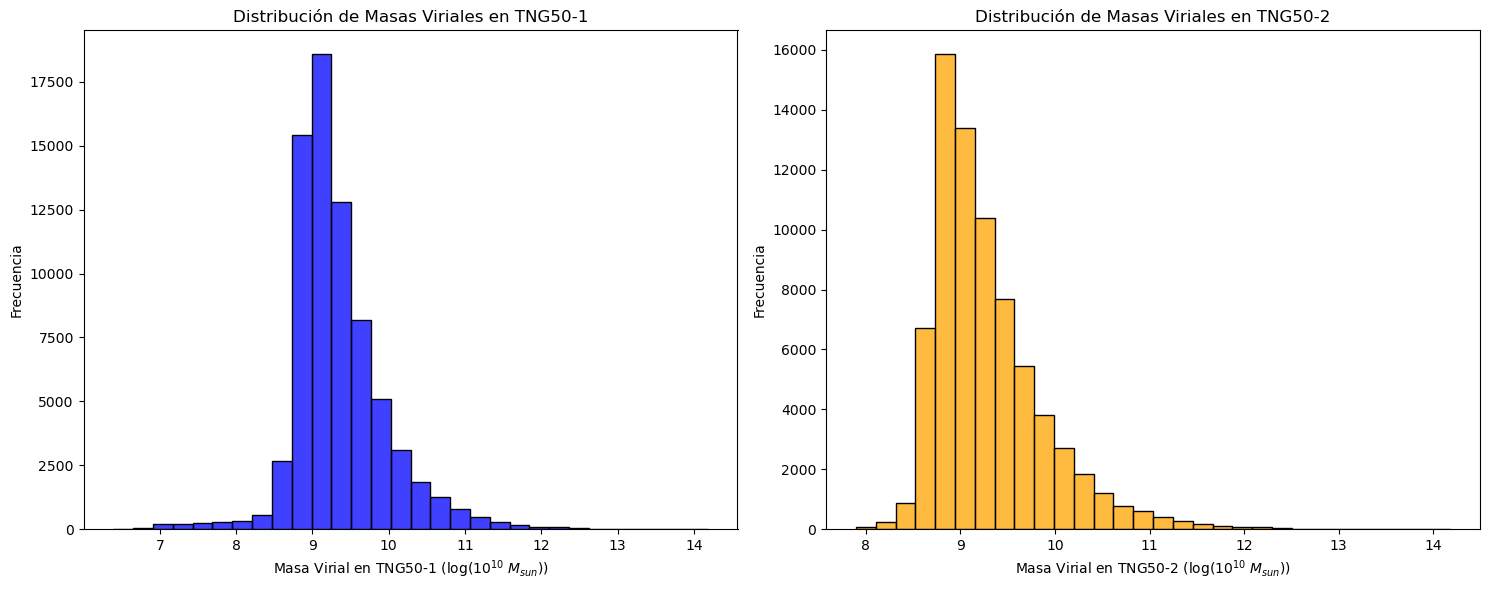

In [19]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
# Graficar histograma de la columna Mvir_TNG50-1
sns.histplot(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), bins=30,
                ax=axs[0], color='blue')
axs[0].set_xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
axs[0].set_ylabel('Frecuencia')
axs[0].set_title('Distribución de Masas Viriales en TNG50-1')

# Graficar histograma de la columna Mvir_TNG50-2
sns.histplot(np.log10(df_noduplicates['Mvir_TNG50-2']*10**10), bins=30,
                ax=axs[1], color='orange')
axs[1].set_xlabel('Masa Virial en TNG50-2 (log($10^{10}$ $M_{sun}$))')
axs[1].set_ylabel('Frecuencia')
axs[1].set_title('Distribución de Masas Viriales en TNG50-2')
plt.tight_layout()
plt.show()

In [20]:
df_combined.columns

Index(['subhalo_TNG50-1', 'halo_TNG50-1', 'Mvir_TNG50-1', 'halo_TNG50-2',
       'Mvir_TNG50-2', 'dist', 'cost'],
      dtype='object')

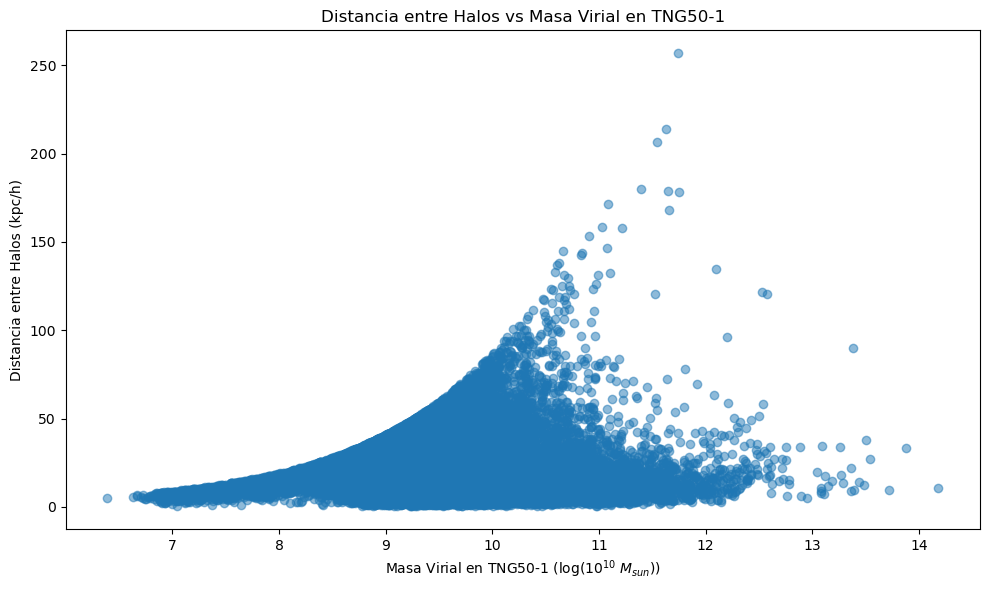

In [21]:
#grafica distancia (dist) entre halos como funcion de la masa del halo en TNG50-1
plt.figure(figsize=(10,6))
plt.scatter(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), df_noduplicates['dist'], alpha=0.5)
plt.xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Distancia entre Halos (kpc/h)')
plt.title('Distancia entre Halos vs Masa Virial en TNG50-1')
plt.tight_layout()
plt.show()

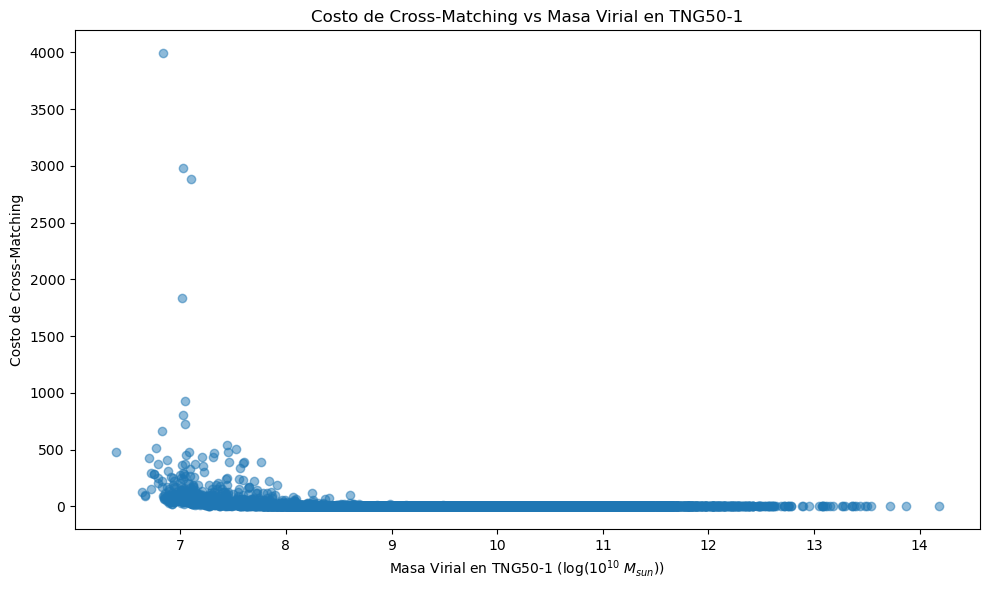

In [22]:
#grafica de costo como funcion de la masa del halo en TNG50-1
plt.figure(figsize=(10,6))
plt.scatter(np.log10(df_noduplicates['Mvir_TNG50-1']*10**10), df_noduplicates['cost'], alpha=0.5)
plt.xlabel('Masa Virial en TNG50-1 (log($10^{10}$ $M_{sun}$))')
plt.ylabel('Costo de Cross-Matching')
plt.title('Costo de Cross-Matching vs Masa Virial en TNG50-1')
plt.tight_layout()
plt.show()

In [23]:
df_noduplicates.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,dist,cost
18,11,0,15167.142578,0.0,15105.009766,10.565468,0.010570
371,63909,1,7466.339355,1.0,7437.246094,33.096275,0.038851
373,96763,2,5243.999512,2.0,5271.313477,9.371114,0.013369
10,117266,3,3470.526367,3.0,3376.912842,27.258743,0.049161
24,143886,4,3142.989746,4.0,3218.309570,37.803322,0.063604


In [24]:
#tomar solo un rango de masas entre la masa minima y maxima de df (halos con disco)
df_filtered = df_combined.copy()
df_filtered = df_filtered[(df_filtered['Mvir_TNG50-1'] >= df['Mvir_TNG50-1'].min()) & (df_filtered['Mvir_TNG50-1'] <= df['Mvir_TNG50-1'].max())].reset_index(drop=True)
len(df_filtered)

437

In [25]:
print(df['Mvir_TNG50-1'].min(), df['Mvir_TNG50-1'].max())

107.66678619384766 15167.142578125


## Aca está el filtro de masas de los halos sin disco 

In [26]:
#añadir una columna que indique si el halo tiene disco o no
df_filtered['has_disk'] = df_filtered['halo_TNG50-1'].isin(df['halo_TNG50-1']).astype(int)
df_filtered['has_disk'].value_counts()

has_disk
1    377
0     60
Name: count, dtype: int64

In [27]:
df_test = df_filtered.copy()
df_test = df_test.drop(columns=['dist', 'cost'])

df_test.head()

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,has_disk
0,11,0,15167.142578,0.0,15105.009766,1
1,37,0,15167.142578,0.0,15105.009766,1
2,45,0,15167.142578,0.0,15105.009766,1
3,17,0,15167.142578,0.0,15105.009766,1
4,44,0,15167.142578,0.0,15105.009766,1


In [28]:
df_test_noduplicates = df_test.drop_duplicates(subset='halo_TNG50-1')

df_test_noduplicates['has_disk'].value_counts() 

has_disk
1    108
0     60
Name: count, dtype: int64

In [29]:
df_test_noduplicates

,subhalo_TNG50-1,halo_TNG50-1,Mvir_TNG50-1,halo_TNG50-2,Mvir_TNG50-2,has_disk
0,11,0,15167.142578,0.0,15105.009766,1
8,63909,1,7466.339355,1.0,7437.246094,1
22,96763,2,5243.999512,2.0,5271.313477,1
26,117266,3,3470.526367,3.0,3376.912842,1
44,143886,4,3142.989746,4.0,3218.309570,1
...,...,...,...,...,...,...
432,517271,174,112.801003,173.0,113.873550,0
433,517899,175,118.142410,198.0,112.722298,0
434,518682,177,111.006058,150.0,116.627983,0
435,523548,186,110.867027,202.0,107.678017,0


In [30]:
#imprimir indices de los duplicados en TNG50-2 en el dataframe df_test_noduplicates
df_test_noduplicates['halo_TNG50-2'].duplicated().any()


np.False_

In [31]:
#escribir un archivo csv con el dataframe df_test_noduplicates
df_test_noduplicates.to_csv('../../results/halos_matched_disk_noduplicates3_full.csv', index=False)